In [1]:
library(ggplot2)

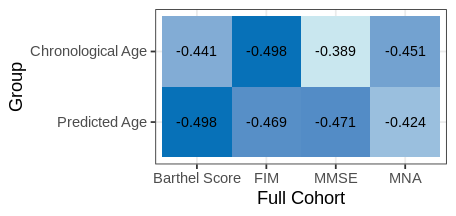

In [2]:
df = data.frame(
#     Data = c('FIM', 'MMSE', 'MNA'),
    True = c(-0.441, -0.498, -0.389, -0.451, -0.192, -0.191, -0.155, -0.325),
    Pred = c(-0.498, -0.469, -0.471, -0.424, -0.436, -0.424, -0.518, -0.339)
)

rownames(df) = c('Barthel Score', 'FIM', 'MMSE', 'MNA', 'Barthel Score.2', 'FIM.2', 'MMSE.2', 'MNA.2')

annot = data.frame(
    Group = c(rep('Full', 4), rep('Non_Community', 4))
)
rownames(annot) = rownames(df)

gdf = data.frame(
    cor = c(df[1:4,]$True, df[1:4,]$Pred),
    grp = c(rep('Chronological Age', 4), rep('Predicted Age', 4)),
    ind = c(rep(rownames(df)[1:4], 2))
)

options(repr.plot.width=3.8, repr.plot.height=1.8)
ggplot(gdf, aes(ind, factor(grp, levels = c('Predicted Age', 'Chronological Age')), 
                fill=cor))+
    geom_tile()+
    theme_bw()+
    xlab('Full Cohort')+
    ylab('Group')+
    scale_fill_gradient(low = "#0771B8", high = "#C9E7EF")+
    geom_text(aes(label=cor),size=3)+
    guides(fill='none')

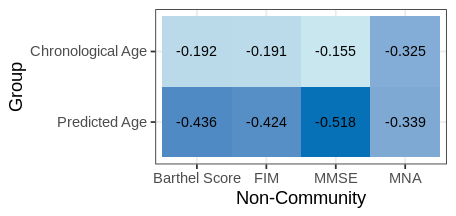

In [3]:
gdf = data.frame(
    cor = c(df[5:8,]$True, df[5:8,]$Pred),
    grp = c(rep('Chronological Age', 4), rep('Predicted Age', 4)),
    ind = c(rep(rownames(df)[1:4], 2))
)

options(repr.plot.width=3.8, repr.plot.height=1.8)
ggplot(gdf, aes(ind, factor(grp, levels = c('Predicted Age', 'Chronological Age')), 
                fill=cor))+
    geom_tile()+
    theme_bw()+
    xlab('Non-Community')+
    ylab('Group')+
    scale_fill_gradient(low = "#0771B8", high = "#C9E7EF")+
    geom_text(aes(label=cor),size=3)+
    guides(fill='none')

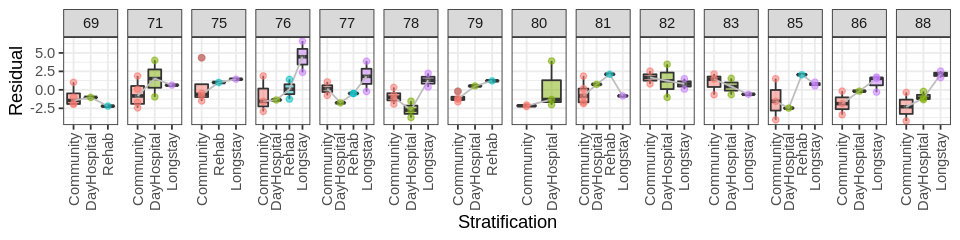

In [4]:
data = read.csv('Data/19.Eldermet_pred_residual_frail_metrics_cor_plot.csv')

options(repr.plot.width=8, repr.plot.height=2)
ggplot(data, aes(factor(Stratification), Residual, fill=factor(Stratification)))+
    geom_boxplot(alpha=.5)+
    theme_bw()+
    facet_grid(~factor(Age), scales = 'free_x')+
    stat_summary(fun=median, geom="line", aes(group=1), color='grey')+ 
    stat_summary(fun=median, geom="point", color='grey', size=1, alpha=.2)+
    geom_point(aes(color=factor(Stratification), alpha=.8))+
    guides(fill='none', color='none', alpha='none')+
    scale_x_discrete(breaks=c(1,2,3,4),
                     labels=c('Community', 'DayHospital', 'Rehab', 'Longstay'))+
    theme(axis.text.x = element_text(angle=90, hjust = 1, vjust = .5))+
    ylab('Residual')+
    xlab('Stratification')

Warning message:
“Removed 7 rows containing non-finite values (stat_ellipse).”
Warning message in MASS::cov.trob(data[, vars]):
“Probable convergence failure”
Warning message:
“Removed 7 rows containing missing values (geom_point).”


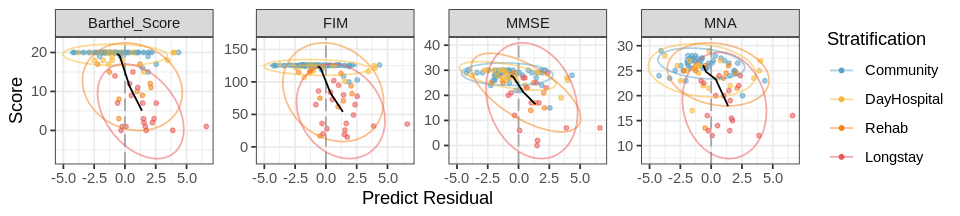

In [5]:
data = read.csv('Data/20.Eldermet_pred_residual_frail_with_midpoint_and_normscore_ggplot.csv')

options(repr.plot.width=8, repr.plot.height=1.8)
ggplot(data, aes(Residual, Score))+
    theme_bw()+
    geom_point(aes(color=factor(Stratification), alpha=.8), size=1)+
    geom_vline(xintercept=0, color='#A4A4A5', linetype='longdash')+
    stat_ellipse(aes(color=factor(Stratification)), alpha=.5)+
    geom_line(aes(MidX, MidY))+
    xlab('Predict Residual')+
    ylab('Score')+
    labs(color='Stratification')+
    guides(alpha='none')+
    facet_wrap(~Type, nrow = 1, scales = 'free_y')+
    scale_color_manual(values = c('#58A2C7', '#F8B735', '#F38218', '#E95656'),
                       labels = c('Community', 'DayHospital', 'Rehab', 'Longstay'))

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



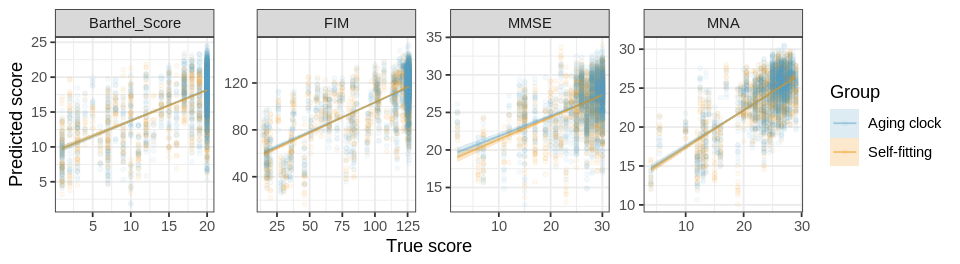

In [6]:
data = read.csv('Data/21.marker_based_frail_socre_pred_comp_plot.csv')

options(repr.plot.width=8, repr.plot.height=2.2)
ggplot(data, aes(True, Pred, color=Group))+
    geom_point(alpha=.05, size=1)+
    geom_smooth (alpha=0.2, size=0, span=0.5, method = 'lm', aes(fill=Group))+
    stat_smooth(method = 'lm', alpha=0.5, geom="line")+
    facet_wrap(~Score, nrow = 1, scales = 'free')+
    theme_bw()+
    scale_fill_manual(values = c('#58A2C7', '#F09307'), labels=c('Aging clock', 'Self-fitting'))+
    scale_color_manual(values = c('#58A2C7', '#F09307'), labels=c('Aging clock', 'Self-fitting'))+
    ylab('Predicted score')+
    xlab('True score')